In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import seaborn as sns
from subprocess import check_output

In [2]:
df = pd.read_csv('/content/rainfaLLIndia-2.csv')
df.info()
df.dropna(how='any', inplace=True)
# Any results you write to the current

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4332 entries, 0 to 4331
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   subdivision  4332 non-null   object 
 1   YEAR         4332 non-null   int64  
 2   JUN          4332 non-null   float64
 3   JUL          4332 non-null   float64
 4   AUG          4332 non-null   float64
 5   SEP          4332 non-null   float64
 6   JUN-SEP      4332 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 237.0+ KB


In [3]:
subdivs = df['subdivision'].unique()
num_of_subdivs = subdivs.size
print('Total no. of Subdivs: ' + str(num_of_subdivs))
subdivs

Total no. of Subdivs: 36


array(['ANDAMAN & NICOBAR ISLAND', 'ARUNACHAL PRADESH',
       'ASSAM & MEGHALAYA', 'NAGALAND, MANIPUR, MIZORAM, TRIPURA',
       'SUB HIMALAYAN W.BENGAL & SIKKIM', 'GANGETIC W.BENGAL', 'ORISSA',
       'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH', 'WEST UTTAR PRADESH',
       'UTTARANCHAL', 'HARYANA, DELHI & CHANDIGARH', 'PUNJAB',
       'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'WEST RAJASTHAN',
       'EAST RAJASTHAN', 'WEST MADHYA PRADESH', 'EAST MADHYA PRADESH',
       'GUJARAT REGION', 'SAURASHTRA & KUTCH', 'KONKAN & GOA',
       'MADHYA MAHARASHTRA', 'MARATHWADA', 'VIDARBHA', 'CHATHISGARH',
       'COASTAL ANDHRA PRADESH & YANAM', 'TELANGANA', 'RAYALSEEMA',
       'TAMIL NADU, PUDUCHERRY & KARAIKAL', 'COASTAL KARNATAKA',
       'NORTH INTERIOR KARNATAKA', 'SOUTH INTERIOR KARNATAKA',
       'KERALA & MAHE', 'LAKSHDWEEP'], dtype=object)

<AxesSubplot:xlabel='JUN-SEP_bin', ylabel='Count'>

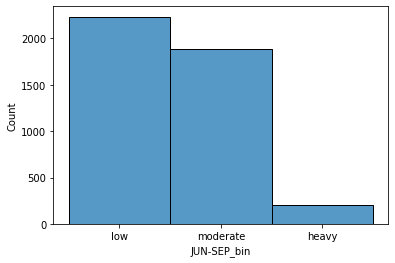

In [18]:
# bins = np.linspace(min(df['JUN-SEP']), max(df['JUN-SEP']), 4)
bins = [0, 900, 2700, max(df['JUN-SEP'])]
labels = ['low', 'moderate', 'heavy']

df['JUN-SEP_bin'] = pd.cut(df['JUN-SEP'], bins=bins, labels=labels, include_lowest=True)
df.head()

sns.histplot(df, x='JUN-SEP_bin')

subdivision
COASTAL KARNATAKA    2977.210744
KONKAN & GOA         2824.542975
ARUNACHAL PRADESH    2187.467961
Name: JUN-SEP, dtype: float64
subdivision
RAYALSEEMA                           385.190083
TAMIL NADU, PUDUCHERRY & KARAIKAL    328.969421
WEST RAJASTHAN                       264.376860
Name: JUN-SEP, dtype: float64


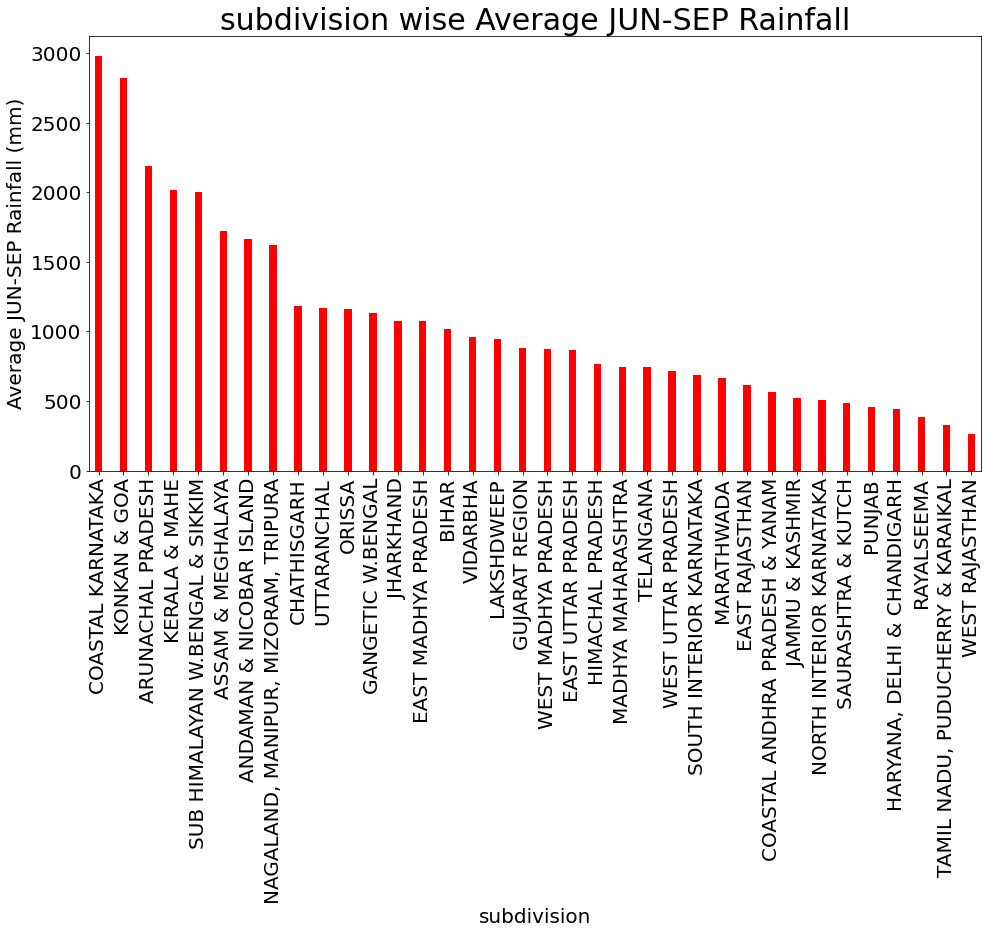

In [4]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
df.groupby('subdivision').mean().sort_values(by='JUN-SEP', ascending=False)['JUN-SEP'].plot(kind='bar', color='r',width=0.3,title='subdivision wise Average JUN-SEP Rainfall', fontsize=20)
plt.xticks(rotation = 90)
plt.ylabel('Average JUN-SEP Rainfall (mm)')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print(df.groupby('subdivision').mean().sort_values(by='JUN-SEP', ascending=False)['JUN-SEP'][[0,1,2]])
print(df.groupby('subdivision').mean().sort_values(by='JUN-SEP', ascending=False)['JUN-SEP'][[33,34,35]])

Max: 45082.6 ocurred in [1961]
Max: 29426.6 ocurred in [1972]
Mean: 37846.11404958677


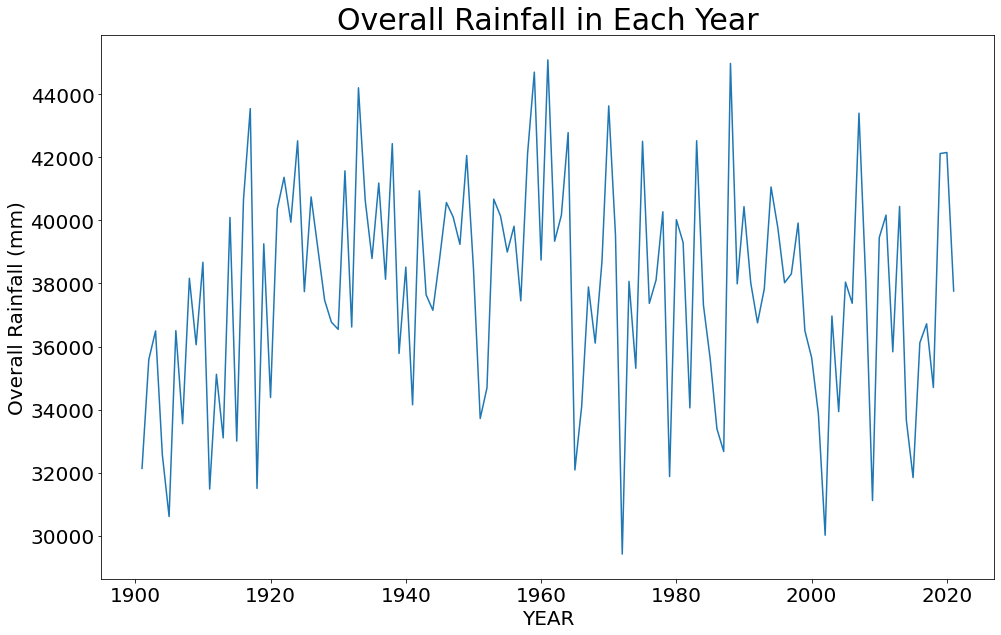

In [5]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = df.groupby('YEAR').sum()['JUN-SEP']
dfg.plot(kind='line', title='Overall Rainfall in Each Year', fontsize=20)
#df.groupby('YEAR').sum()['JUN-SEP'].plot()
#plt.xlim(0, 115)
#plt.xticks(np.linspace(0,115,24,endpoint=True),np.linspace(1900,2015,24,endpoint=True).astype(int))
#plt.xticks(np.linspace(1901,2015,24,endpoint=True))
#plt.xticks(rotation = 90)
plt.ylabel('Overall Rainfall (mm)')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print('Max: ' + str(dfg.max()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.max()].index.values[0:]))
print('Max: ' + str(dfg.min()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.min()].index.values[0:]))
print('Mean: ' + str(dfg.mean()))

Max: 1062.4463394978638 ocurred in ['JUN-SEP']
Max: 198.60529063652933 ocurred in ['SEP']
Mean: 425.23296229293373


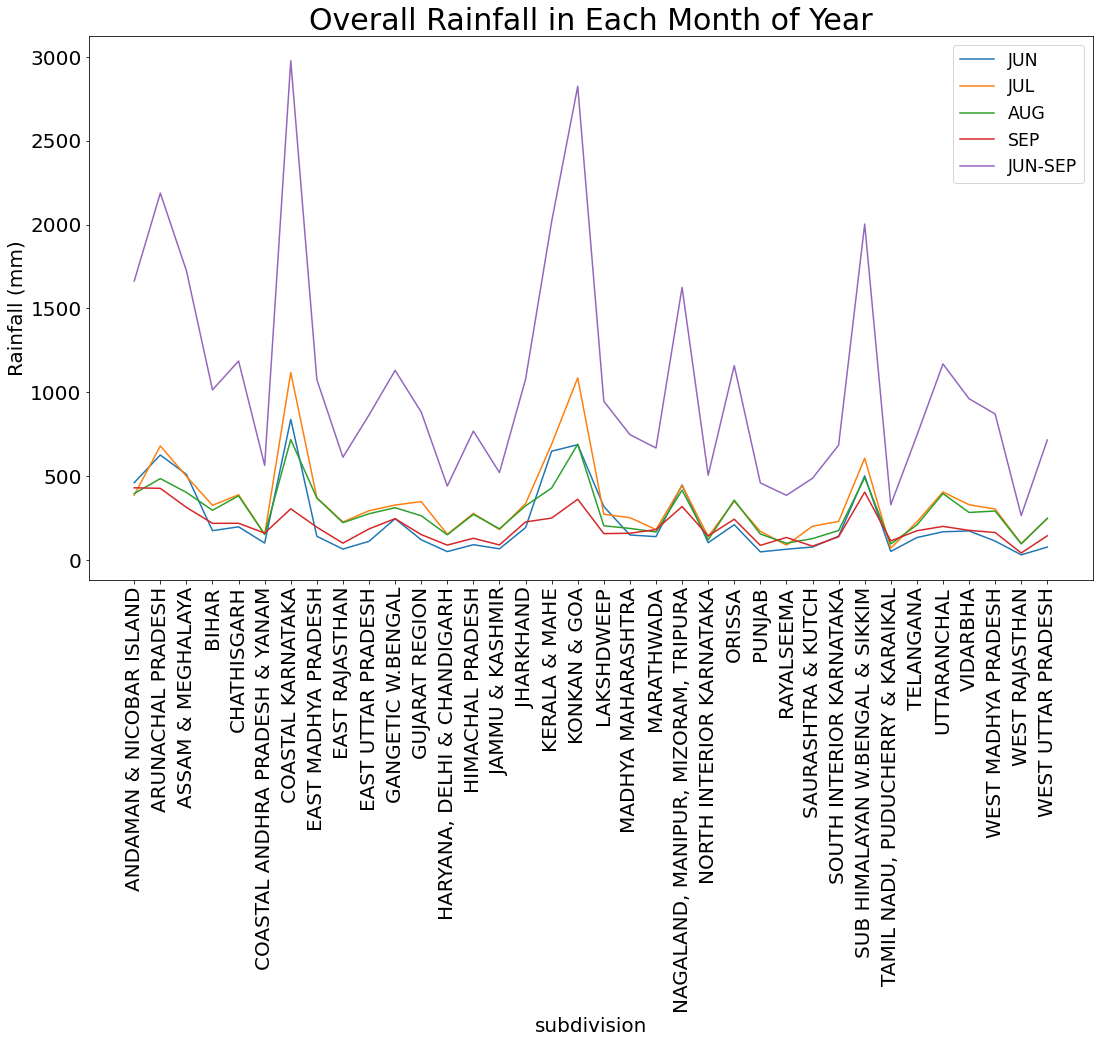

In [6]:
months = df.columns[2:14]
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
xlbls = df['subdivision'].unique()
xlbls.sort()
dfg = df.groupby('subdivision').mean()[months]
dfg.plot.line(title='Overall Rainfall in Each Month of Year', ax=ax,fontsize=20)
plt.xticks(np.linspace(0,35,36,endpoint=True),xlbls)
plt.xticks(  rotation = 90)
plt.ylabel('Rainfall (mm)')
plt.legend(loc='upper right', fontsize = 'xx-large')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

dfg = dfg.mean(axis=0)
print('Max: ' + str(dfg.max()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.max()].index.values[0:]))
print('Max: ' + str(dfg.min()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.min()].index.values[0:]))
print('Mean: ' + str(dfg.mean()))

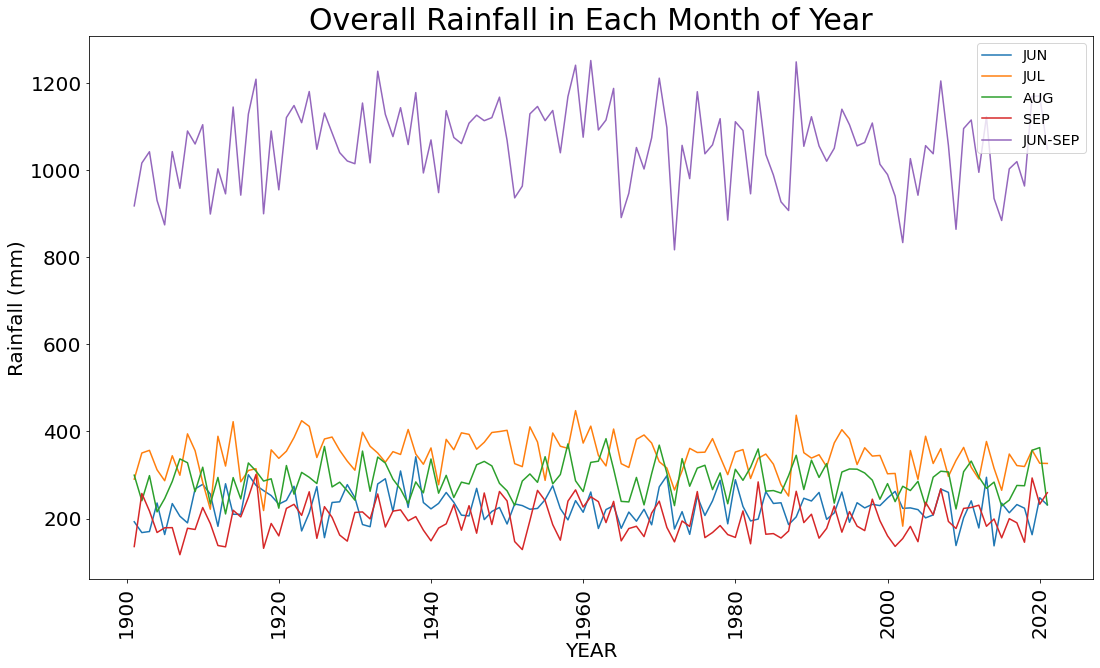

In [7]:
months = df.columns[2:14]
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df.groupby('YEAR').mean()[months].plot.line(title='Overall Rainfall in Each Month of Year', ax=ax,fontsize=20)
#plt.xticks(np.linspace(0,35,36,endpoint=True),xlbls)
plt.xticks(  rotation = 90)
plt.ylabel('Rainfall (mm)')
plt.legend(loc='upper right', fontsize = 'x-large')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

Single Linear Model on Whole Data Ignoring Subdivision


MAD (Training Data): 82.21142676699944
MAD (Test Data): 85.26017904459398


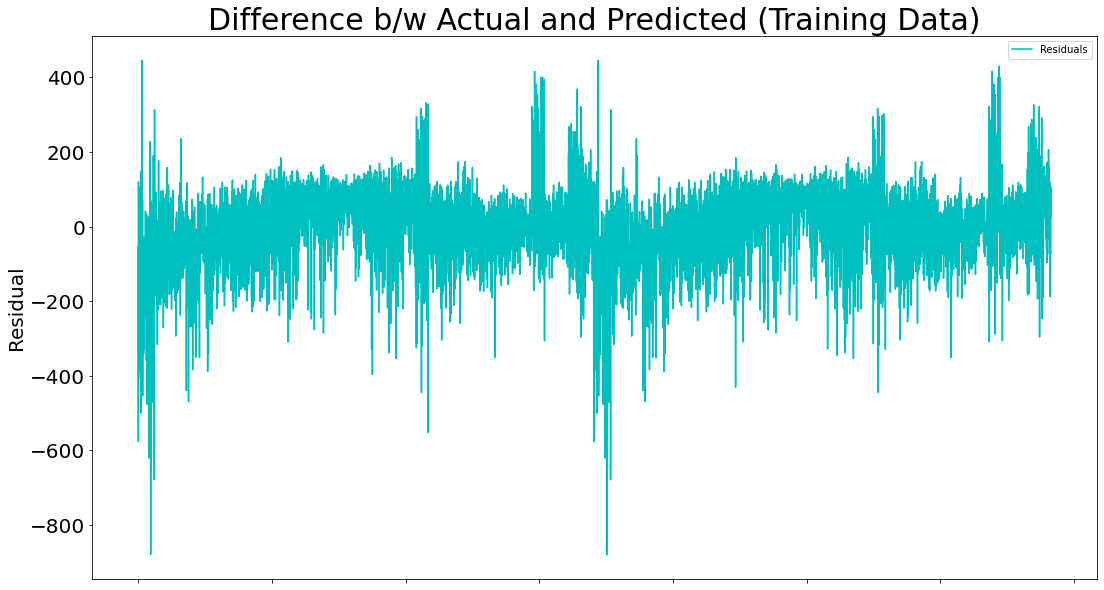

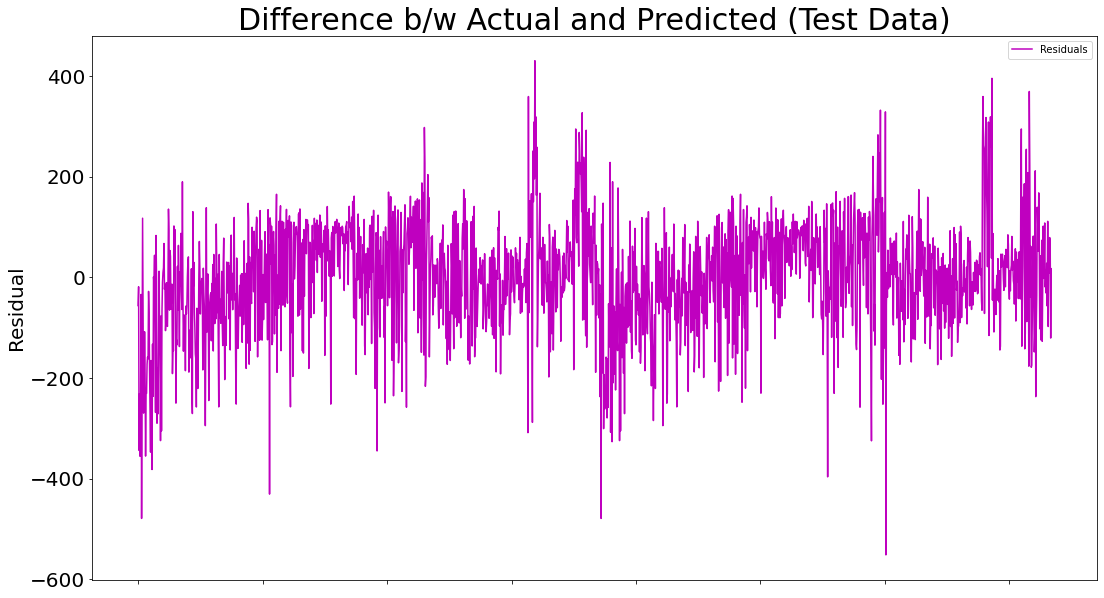

In [8]:
df2 = df[['subdivision',months[0],months[1],months[2],months[3]]]
#df2 = df['YEAR','JAN','FEB','MAR','APR']
df2.columns = np.array(['subdivision', 'x1','x2','x3','x4'])

for k in range(1):
    df3 = df[['subdivision',months[k],months[k+1],months[k+2],months[k+3]]]
    df3.columns = np.array(['subdivision', 'x1','x2','x3','x4'])
    df2 = df2.append(df3)
df2.index = range(df2.shape[0])
    
#df2 = pd.concat([df2, pd.get_dummies(df2['subdivision'])], axis=1)

df2.drop('subdivision', axis=1,inplace=True)
#print(df2.info())
msk = np.random.rand(len(df2)) < 0.8

df_train = df2[msk]
df_test = df2[~msk]
df_train.index = range(df_train.shape[0])
df_test.index = range(df_test.shape[0])

reg = LinearRegression()
reg.fit(df_train.drop('x4',axis=1),df_train['x4'])
predicted_values = reg.predict(df_train.drop('x4',axis=1))
residuals = predicted_values-df_train['x4'].values
print('MAD (Training Data): ' + str(np.mean(np.abs(residuals))))
df_res = pd.DataFrame(residuals)
df_res.columns = ['Residuals']

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res.plot.line(title='Difference b/w Actual and Predicted (Training Data)', color = 'c', ax=ax,fontsize=20)
ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)


predicted_values = reg.predict(df_test.drop('x4',axis=1))
residuals = predicted_values-df_test['x4'].values
print('MAD (Test Data): ' + str(np.mean(np.abs(residuals))))
df_res = pd.DataFrame(residuals)
df_res.columns = ['Residuals']

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res.plot.line(title='Difference b/w Actual and Predicted (Test Data)', color='m', ax=ax,fontsize=20)
ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

Single Linear Model on Whole Data Including Subdivision

MAD (Training Data): 82.4965707332643


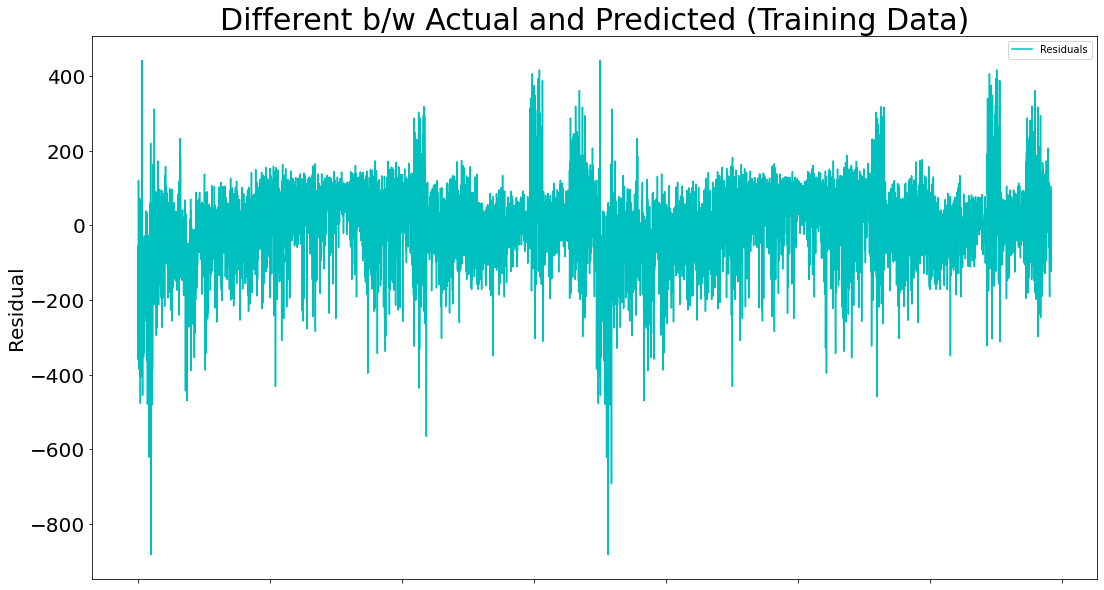

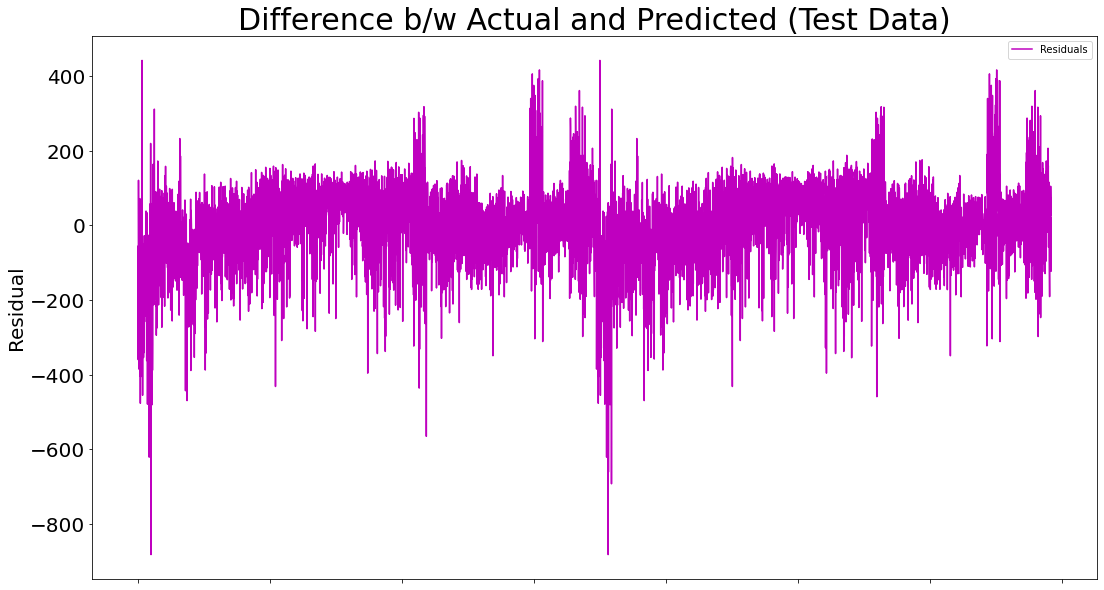

In [9]:
df2 = df[['subdivision',months[0],months[1],months[2],months[3]]]
#df2 = df['YEAR','JAN','FEB','MAR','APR']
df2.columns = np.array(['subdivision', 'x1','x2','x3','x4'])

for k in range(1):
    df3 = df[['subdivision',months[k],months[k+1],months[k+2],months[k+3]]]
    df3.columns = np.array(['subdivision', 'x1','x2','x3','x4'])
    df2 = df2.append(df3)
df2.index = range(df2.shape[0])
    
#df2 = pd.concat([df2, pd.get_dummies(df2['subdivision'])], axis=1)

df2.drop('subdivision', axis=1,inplace=True)
#print(df2.info())
msk = np.random.rand(len(df2)) < 0.8

df_train = df2[msk]
df_test = df2[~msk]
df_train.index = range(df_train.shape[0])
df_test.index = range(df_test.shape[0])

reg = LinearRegression()
reg.fit(df_train.drop('x4',axis=1),df_train['x4'])
predicted_values = reg.predict(df_train.drop('x4',axis=1))
residuals = predicted_values-df_train['x4'].values
print('MAD (Training Data): ' + str(np.mean(np.abs(residuals))))
df_res = pd.DataFrame(residuals)
df_res.columns = ['Residuals']

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res.plot.line(title='Different b/w Actual and Predicted (Training Data)', color = 'c', ax=ax,fontsize=20)
ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res.plot.line(title='Difference b/w Actual and Predicted (Test Data)', color='m', ax=ax,fontsize=20)
ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

Linear Model Fitted to Each Subdivision Category Independently

Overall MAD (Training): 68.88590320476321
Overall MAD (Testing): 70.58997743965448


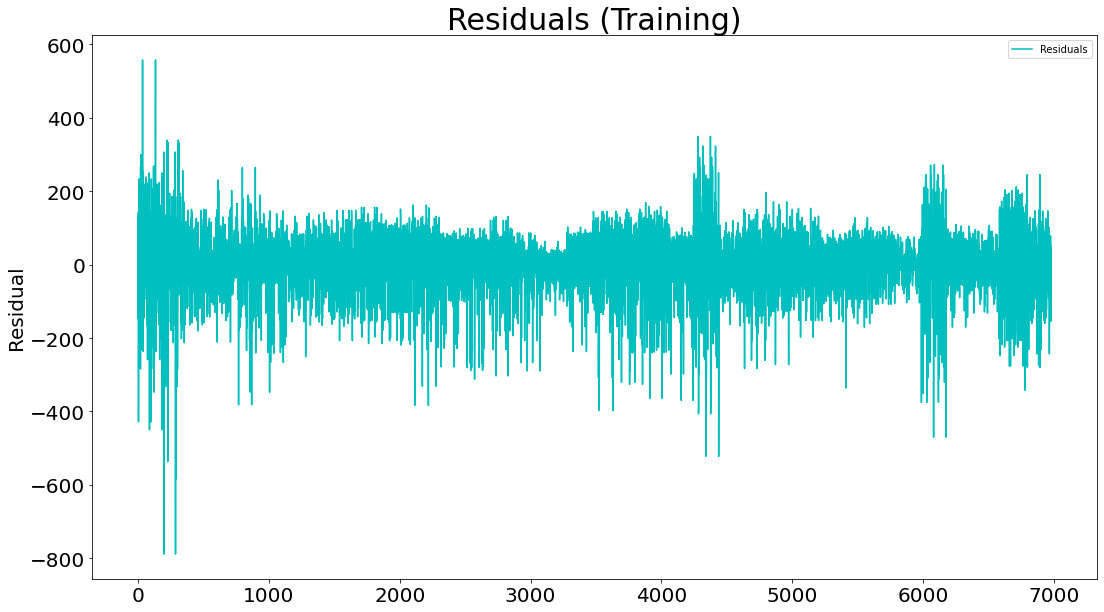

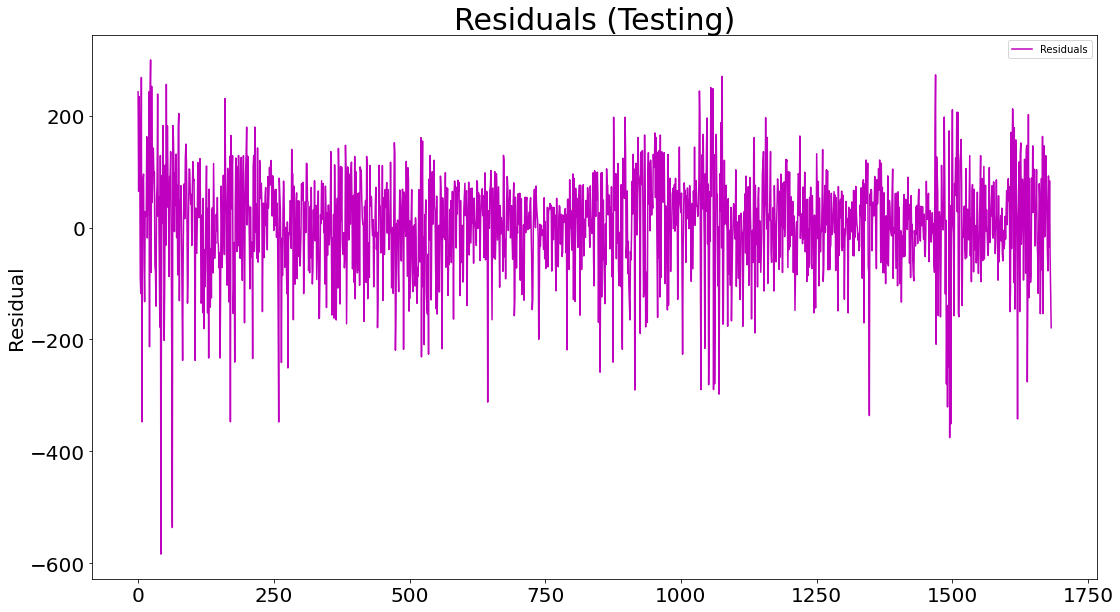

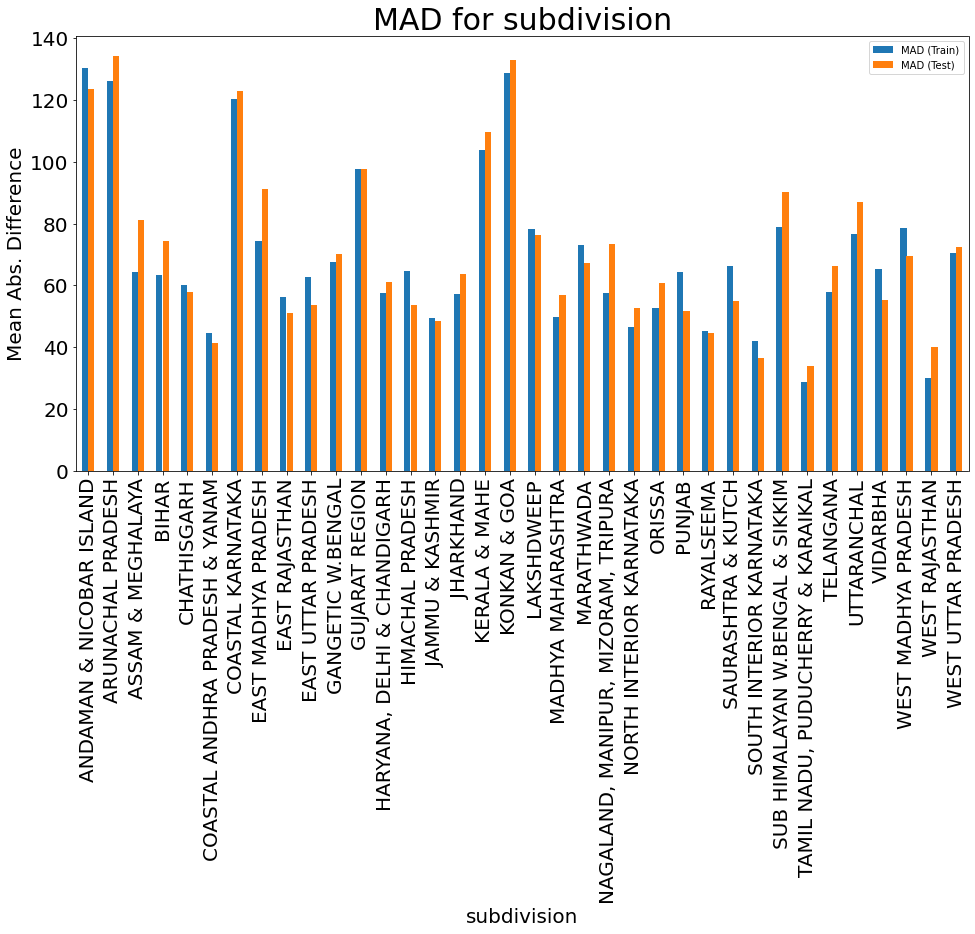

In [10]:
#subdivs = df['subdivision].unique()
#num_of_subdivs = subdivs.size

df_res_training = pd.DataFrame(columns=np.array(['Residuals']))
df_res_testing = pd.DataFrame(columns=np.array(['Residuals']))
list_mad_training = []
mean_abs_diff_training = 0
list_mad_testing = []
mean_abs_diff_testing = 0
for subd in subdivs:
    df1 = df[df['subdivision']==subd]
    df2 = df1[[months[0],months[1],months[2],months[3]]]
    df2.columns = np.array(['x1','x2','x3','x4'])
    for k in range(1):
        df3 = df1[[months[k],months[k+1],months[k+2],months[k+3]]]
        df3.columns = np.array(['x1','x2','x3','x4'])
        df2 = df2.append(df3)
    df2.index = range(df2.shape[0])
    msk = np.random.rand(len(df2)) < 0.8
    df_train = df2[msk]
    df_test = df2[~msk]
    df_train.index = range(df_train.shape[0])
    df_test.index = range(df_test.shape[0])
    reg = LinearRegression()
    reg.fit(df_train.drop('x4',axis=1),df_train['x4'])
    
    predicted_values = reg.predict(df_train.drop('x4',axis=1))
    residuals = predicted_values-df_train['x4'].values
    df_res_training = df_res_training.append(pd.DataFrame(residuals,columns=np.array(['Residuals'])))
    mean_abs_diff_training = mean_abs_diff_training + np.sum(np.abs(residuals))
    list_mad_training.append(np.mean(np.abs(residuals)))
    
    predicted_values = reg.predict(df_test.drop('x4',axis=1))
    residuals = predicted_values-df_test['x4'].values
    df_res_testing = df_res_testing.append(pd.DataFrame(residuals,columns=np.array(['Residuals'])))
    mean_abs_diff_testing = mean_abs_diff_testing + np.sum(np.abs(residuals))
    list_mad_testing.append(np.mean(np.abs(residuals)))
    
    
df_res_training.index = range(df_res_training.shape[0])
mean_abs_diff_training = mean_abs_diff_training/df_res_training.shape[0]
print('Overall MAD (Training): ' + str(mean_abs_diff_training))
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res_training.plot.line(title='Residuals (Training)', color='c',ax=ax,fontsize=20)
#ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

df_res_testing.index = range(df_res_testing.shape[0])
mean_abs_diff_testing = mean_abs_diff_testing/df_res_testing.shape[0]
print('Overall MAD (Testing): ' + str(mean_abs_diff_testing))
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res_testing.plot.line(title='Residuals (Testing)', color='m',ax=ax,fontsize=20)
#ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)


pd_mad = pd.DataFrame(data=list_mad_training,columns=["MAD (Train)"])
pd_mad["MAD (Test)"] = list_mad_testing;
pd_mad['subdivision'] = subdivs;
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
#pd_mad.groupby('subdivision').mean().plot(title='Overall Rainfall in Each Month of Year', ax=ax,fontsize=20)
pd_mad.groupby('subdivision').mean().plot.bar( width=0.5,title='MAD for subdivision', ax= ax, fontsize=20)
plt.xticks(rotation = 90)
plt.ylabel('Mean Abs. Difference')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)